In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
data_train_path = r"C:\Python\Image_Classification\Fruits_Vegetables\train"
data_test_path = r"C:\Python\Image_Classification\Fruits_Vegetables\test"
data_val_path = r"C:\Python\Image_Classification\Fruits_Vegetables\validation"

In [5]:
img_width = 180
img_height =180 

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


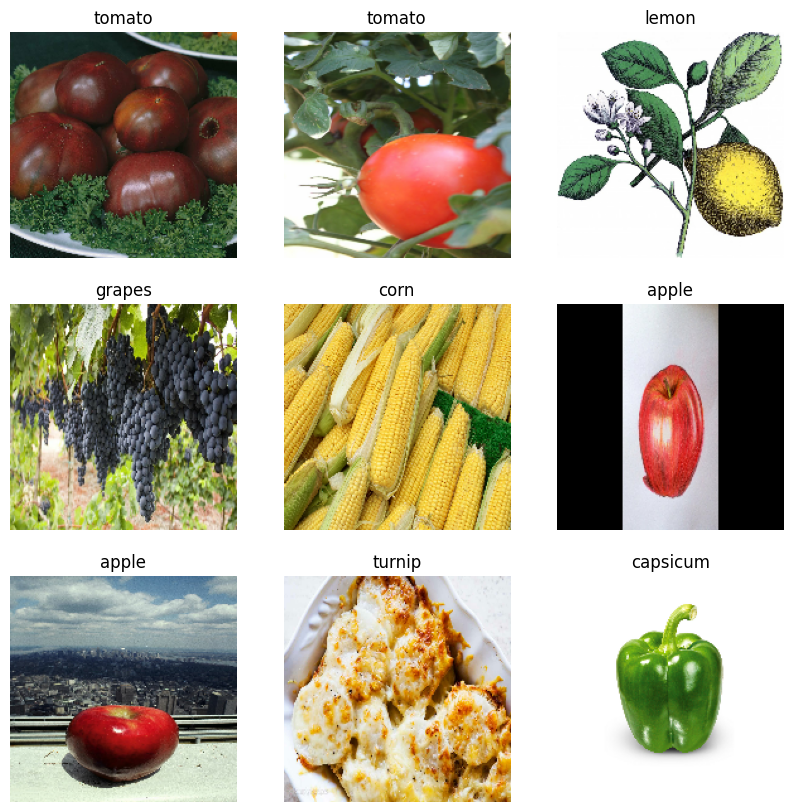

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 88s 817ms/step - accuracy: 0.0457 - loss: 3.8409 - val_accuracy: 0.2336 - val_loss: 2.7604
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 538ms/step - accuracy: 0.2402 - loss: 2.7111 - val_accuracy: 0.5413 - val_loss: 1.6583
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 528ms/step - accuracy: 0.4066 - loss: 2.0382 - val_accuracy: 0.7407 - val_loss: 1.0384
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 637ms/step - accuracy: 0.5707 - loss: 1.4480 - val_accuracy: 0.8405 - val_loss: 0.6819
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 588ms/step - accuracy: 0.7395 - loss: 0.8917 - val_accuracy: 0.9174 - val_loss: 0.4402
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 772ms/step - accuracy: 0.8753 - loss: 0.4442 - val_accuracy: 0.9288 - val_loss: 0.4488
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 612ms/step - accuracy: 0.9054 - loss: 0.3362 - val_accuracy: 0.9231 - val_loss: 0.4467
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 523ms/step - accuracy: 0.9311 - loss: 0.2478 - val_accu

Text(0.5, 1.0, 'Loss')

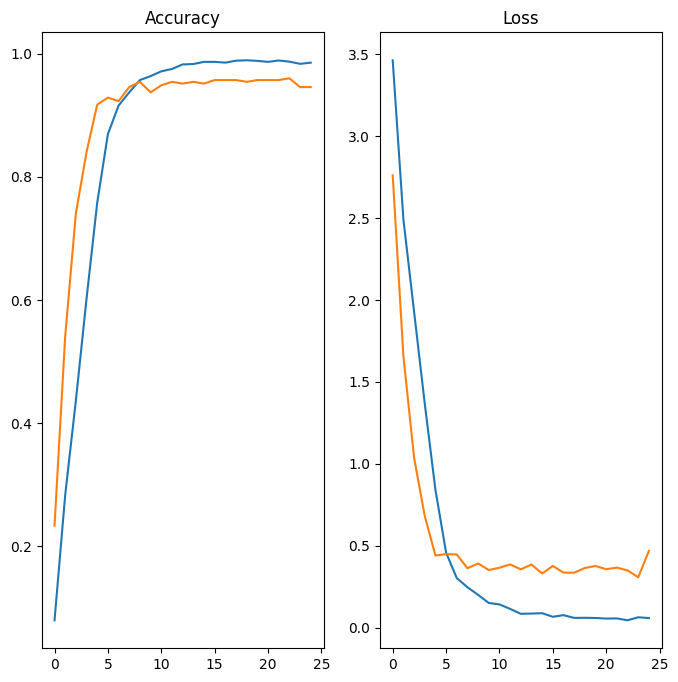

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image ="C:\\Python\\Image_Classification\\Fruits_Vegetables\\Banana.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 92.11


In [23]:
model.save('Image_classify.keras')